In [2]:
import numpy as np # linear algebra 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import statsmodels.formula.api as smf # stats models: regression fitting
import seaborn as sns # data visualization

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/Labour.csv') # dataframe - загрузили данные
df.shape # показывает формат rows x columns

(569, 4)

In [6]:
df

,capital,labour,output,wage
0,2.606563,184,9.250759,43.080307
1,1.323237,91,3.664310,27.780016
2,22.093692,426,28.781516,44.467748
3,10.737851,72,4.124642,39.734710
4,1.161365,46,2.890150,34.650709
...,...,...,...,...
564,2.625403,20,1.424376,33.477545
565,1.276386,61,2.109048,26.300732
566,1.953869,117,6.241870,41.153979
567,1.318527,46,7.902237,66.720139


# Гистограмма №1

<AxesSubplot:xlabel='output', ylabel='Count'>

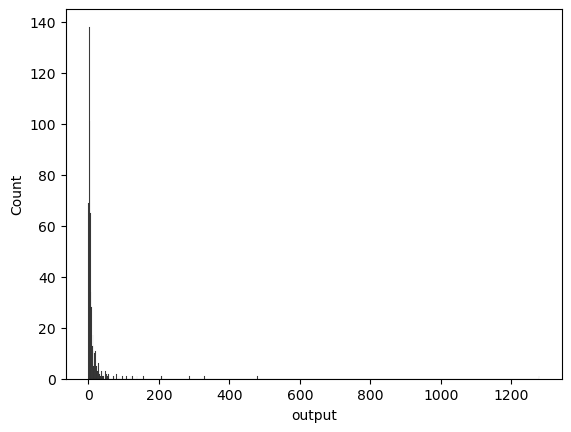

In [10]:
sns.histplot(data=df, x='output', color='black')

# Гистограмма №2

<AxesSubplot:xlabel='output', ylabel='Count'>

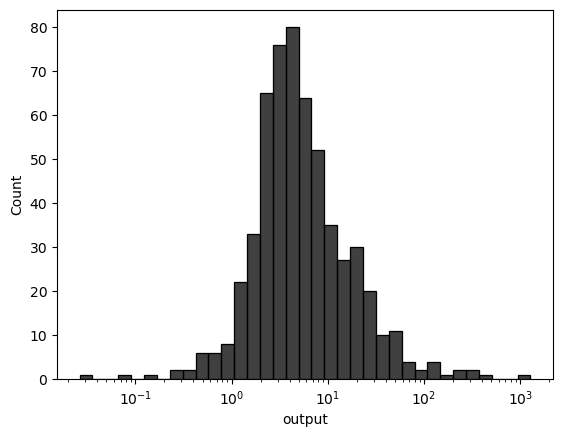

In [11]:
sns.histplot(data=df, x='output', log_scale=True, color='black')

# Гистограмма №3

<AxesSubplot:xlabel='capital', ylabel='Count'>

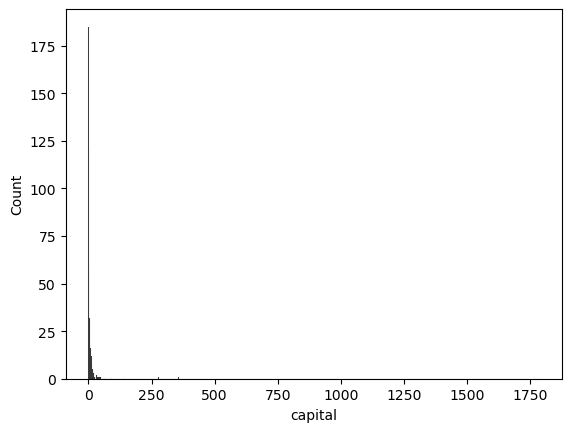

In [13]:
sns.histplot(data=df, x='capital', color='black')

# Гистограмма №4

<AxesSubplot:xlabel='capital', ylabel='Count'>

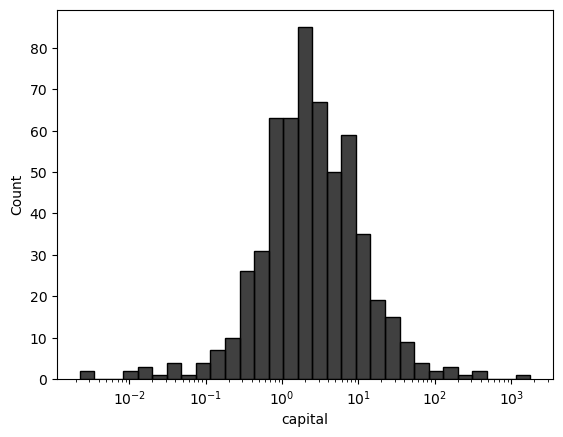

In [14]:
sns.histplot(data=df, x='capital', log_scale=True, color='black')

# 2.2.1 Пример №1

# Диаграмма рассеяним output vs capital с ‘подогнанной’ прямой

<AxesSubplot:xlabel='capital', ylabel='output'>

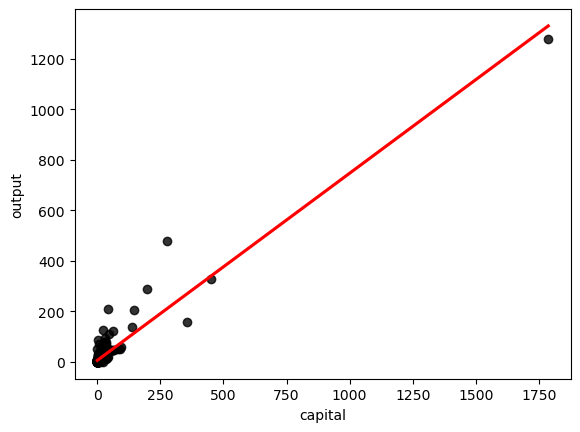

In [16]:
sns.regplot(data=df, x='capital', y='output', ci=None, color='black', line_kws={"color": "r"})

## - Поиск параметров оптимальной прямой output на capital

In [18]:
fitted_line = smf.ols(formula='output~capital', data=df).fit() # подгонка прямой
fitted_line.params.round(2) # коэффициенты с округлением

Intercept    6.19
capital      0.74
dtype: float64

## - Поиск параметров оптимальной прямой output на capital без константы

In [19]:
fitted_line = smf.ols(formula='output~-1+capital', data=df).fit() # подгонка прямой
fitted_line.params.round(2) # коэффициенты с округлением

capital    0.75
dtype: float64

# Диаграмма рассеяним log(output) vs log(capital) с ‘подогнанной’ прямой

<AxesSubplot:xlabel='capital', ylabel='output'>

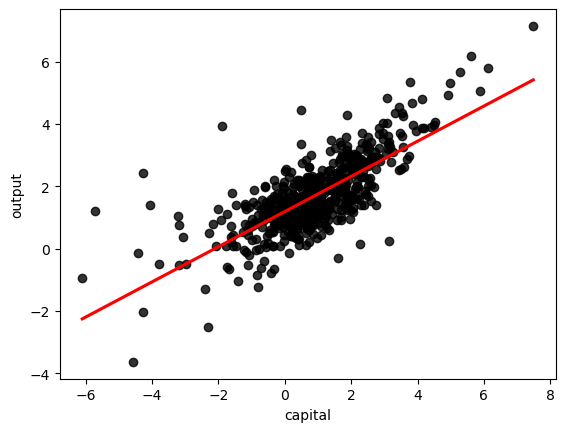

In [20]:
sns.regplot(x=np.log(df['capital']), y=np.log(df['output']), ci=None, color='black', line_kws={"color": "r"})

## - Поиск параметров оптимальной прямой log(output) на log(capital)

In [21]:
fitted_line = smf.ols(formula='np.log(output)~np.log(capital)', data=df).fit() # подгонка прямой
fitted_line.params.round(2) # коэффициенты с округлением

Intercept          1.19
np.log(capital)    0.56
dtype: float64

## - Поиск параметров оптимальной прямой log(output) на log(capital) без константы

In [22]:
fitted_line = smf.ols(formula='np.log(output)~-1+np.log(capital)', data=df).fit() # подгонка прямой
fitted_line.params.round(2) # коэффициенты с округлением

np.log(capital)    0.88
dtype: float64

# 2.2.2 Пример №2

# Диаграмма рассеяним output vs labour с ‘подогнанной’ прямой

<AxesSubplot:xlabel='labour', ylabel='output'>

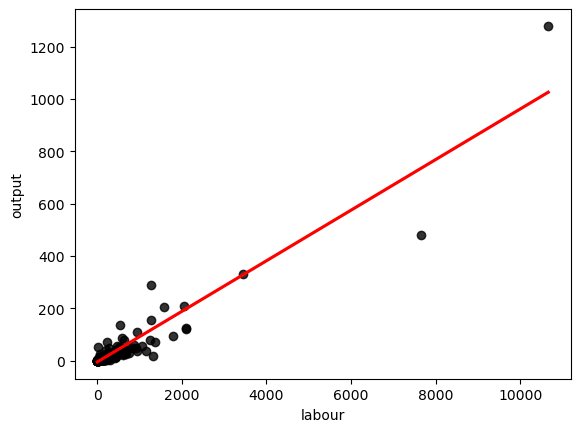

In [23]:
sns.regplot(data=df, x='labour', y='output', ci=None, color='black', line_kws={"color": "r"})

## - Поиск параметров оптимальной прямой output на labour

In [24]:
fitted_line = smf.ols(formula='output~labour', data=df).fit() # подгонка прямой
fitted_line.params.round(2) # коэффициенты с округлением

Intercept   -4.72
labour       0.10
dtype: float64

## - Поиск параметров оптимальной прямой output на labour без константы

In [25]:
fitted_line = smf.ols(formula='output~-1+labour', data=df).fit() # подгонка прямой
fitted_line.params.round(2) # коэффициенты с округлением

labour    0.09
dtype: float64

# Диаграмма рассеяним log(output) vs log(labour) с ‘подогнанной’ прямой

<AxesSubplot:xlabel='labour', ylabel='output'>

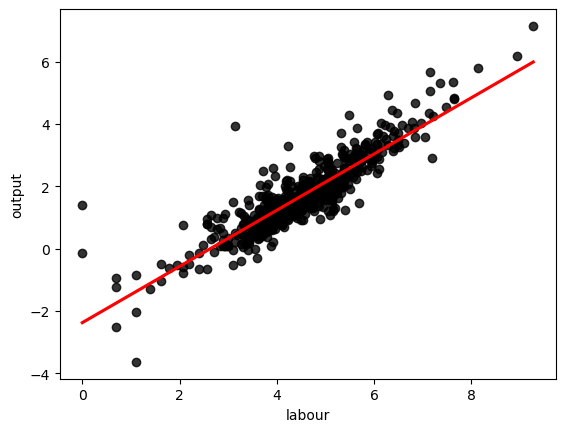

In [26]:
sns.regplot(x=np.log(df['labour']), y=np.log(df['output']), ci=None, color='black', line_kws={"color": "r"})

## - Поиск параметров оптимальной прямой log(output) на log(labour)

In [27]:
fitted_line = smf.ols(formula='np.log(output)~np.log(labour)', data=df).fit() # подгонка прямой
fitted_line.params.round(2) # коэффициенты с округлением

Intercept        -2.38
np.log(labour)    0.90
dtype: float64

## - Поиск параметров оптимальной прямой log(output) на log(labour) без константы

In [28]:
fitted_line = smf.ols(formula='np.log(output)~-1+np.log(labour)', data=df).fit() # подгонка прямой
fitted_line.params.round(2) # коэффициенты с округлением

np.log(labour)    0.41
dtype: float64

# 2.2.3 Пример №3

# Диаграмма рассеяним log(output) vs log(capital) с ‘подогнанной’ параболой

<AxesSubplot:xlabel='capital', ylabel='output'>

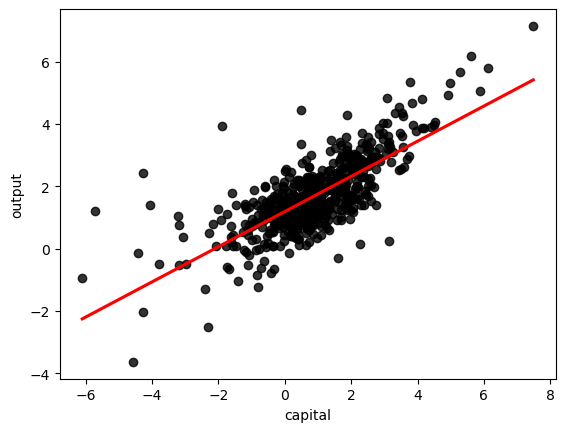

In [31]:
sns.regplot(x=np.log(df['capital']), y=np.log(df['output']), ci=None, color='black', line_kws={"color": "r"})

## - Поиск параметров оптимальной параболы log(output) vs log(capital), log2(capital)

In [33]:
fitted_polynom = smf.ols(formula='np.log(output)~np.log(capital)+I(np.log(capital)**2)', data=df).fit() # подгонка прямой
fitted_polynom.params.round(2) # коэффициенты с округлением

Intercept                  1.09
np.log(capital)            0.50
I(np.log(capital) ** 2)    0.05
dtype: float64

# 2.2.4 Пример №4

# Диаграмма рассеяним log(output) vs log(labour) с ‘подогнанной’ параболой

<AxesSubplot:xlabel='labour', ylabel='output'>

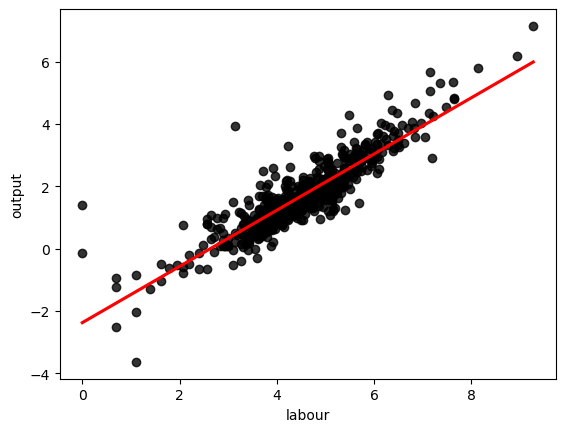

In [34]:
sns.regplot(x=np.log(df['labour']), y=np.log(df['output']), ci=None, color='black', line_kws={"color": "r"})

## - Поиск параметров оптимальной параболы log(output) vs log(labour), log2(labour)

In [35]:
fitted_polynom = smf.ols(formula='np.log(output)~np.log(labour)+I(np.log(labour)**2)', data=df).fit() # подгонка прямой
fitted_polynom.params.round(2) # коэффициенты с округлением

Intercept                -1.28
np.log(labour)            0.37
I(np.log(labour) ** 2)    0.06
dtype: float64

In [42]:
some_string_1 = '😎!'

In [43]:
some_string_1

'😎!'